# Usage Notebook of [README.md](../README.md)

### [`MBTilesHandler`](src/MBTiles_Segmentation/mbtiles_handler.py)

In [1]:
from MBTiles_Segmentation import MBTilesHandler

mbtile_path = "../sample/japan_tokyo.mbtiles"
handler = MBTilesHandler(mbtile_path, drop_lines=False, drop_points=True, drop_polygons=True, min_num_objs=5)

#### Fetch Column Range for a Zoom Level

In [2]:
zoom_level = 12  # Replace with your desired zoom level
col_min, col_max = handler.get_column_minmax(zoom_level)
print(f"Available columns for zoom level {zoom_level}: {col_min} to {col_max}")

Available columns for zoom level 12: 3626 to 3653


#### Fetch Row Range for a Zoom Level

In [3]:
zoom_level = 12  # Replace with your desired zoom level
row_min, row_max = handler.get_row_minmax(zoom_level)
print(f"Available rows for zoom level {zoom_level}: {row_min} to {row_max}")

Available rows for zoom level 12: 2471 to 2495


#### Fetch Tile Data

In [4]:
zoom_level = 10  # Replace with your desired zoom level
tile_col = 907   # Replace with your desired column
tile_row = 619   # Replace with your desired row

tile_data = handler.get_tile(zoom_level, tile_col, tile_row)
if tile_data is not None:
    # Process the tile data, which will be returned as a DataFrame
    print(tile_data)
else:
    print("Tile not found or does not meet the minimum object requirement.")

      id        type                                        coordinates  \
10     1  LineString  [[1352, 525], [1298, 464], [1188, 434], [1025,...   
11     2  LineString  [[1102, 76], [1075, 41], [956, -35], [842, -30...   
12     3  LineString  [[2704, 162], [2830, 112], [2919, 103], [2977,...   
13     4  LineString  [[2510, 124], [2516, 74], [2556, 37], [2526, -...   
14     5  LineString            [[1702, -26], [1691, -56], [1683, -64]]   
...   ..         ...                                                ...   
2208  26  LineString  [[3211, 819], [3239, 881], [3288, 940], [3407,...   
2209  27  LineString  [[4224, 1585], [4131, 1538], [4061, 1521], [39...   
2210  28  LineString  [[3333, 2996], [3436, 3108], [3533, 3188], [36...   
2211  29  LineString  [[4224, 3257], [4133, 3277], [4067, 3283], [37...   
2212  30  LineString  [[3176, 977], [3101, 993], [3079, 992], [3060,...   

                      class  intermittent             name          name:ja  \
10                  

#### Fetch a Random Tile

In [5]:
zoom_level = 12  # Replace with your desired zoom level

random_tile = handler.get_random_tile(zoom_level)
if random_tile is not None:
    # Process the random tile data, which will be returned as a DataFrame
    print(random_tile)
else:
    print("No valid random tile found.")

       id        type                                        coordinates  \
33      1  LineString                         [[221, 3029], [451, 3095]]   
34      2  LineString                         [[195, 3019], [221, 3029]]   
35      3  LineString  [[909, 3230], [967, 3314], [1002, 3343], [1041...   
36      4  LineString                         [[321, 4063], [322, 4077]]   
37      5  LineString                         [[322, 4077], [328, 4091]]   
...    ..         ...                                                ...   
19670  89  LineString  [[2376, 4224], [2947, 3856], [3134, 3745], [34...   
19671  90  LineString   [[-128, 350], [95, 344], [508, 418], [663, 435]]   
19672  91  LineString                         [[467, 1537], [2133, 782]]   
19673  92  LineString  [[3039, 1393], [2812, 1508], [2752, 1545], [26...   
19674  93  LineString  [[288, 1912], [418, 1848], [799, 1630], [1067,...   

         class  intermittent   name           name:en name:ja name:ja_kana  \
33       

#### Fetch Area Tiles

In [6]:
zoom_std = 10   # Replace with your standard zoom level
col_std = 907   # Replace with your standard column
row_std = 619   # Replace with your standard row
zoom_target = 11  # Replace with your desired target zoom level

area_tiles = handler.get_area_tiles(zoom_std, col_std, row_std, zoom_target)
if area_tiles is not None:
    # Process the area tiles data, which will be returned as a list of DataFrames
    for tile_data in area_tiles:
        print(tile_data)
else:
    print("No valid area tiles found.")

      id        type                                        coordinates  \
10     2  LineString  [[68, 275], [84, 184], [145, 170], [183, 126],...   
11     3  LineString  [[2017, 1127], [1892, 1097], [1822, 1023], [17...   
12     4  LineString  [[2446, 1538], [2332, 1448], [2204, 1389], [19...   
13     5  LineString  [[3765, 3472], [3780, 3587], [3839, 3659], [39...   
14     6  LineString  [[-64, 2013], [-7, 1978], [37, 1982], [98, 192...   
...   ..         ...                                                ...   
1135   7  LineString  [[1847, 3414], [1980, 3515], [2102, 3651], [21...   
1136   8  LineString                           [[338, -128], [420, 73]]   
1137   9  LineString  [[641, -128], [664, -101], [722, 9], [761, 234...   
1138  10  LineString  [[4224, 2332], [4200, 2359], [4038, 2404], [40...   
1139  11  LineString  [[3413, 257], [3392, 257], [3376, 283], [3348,...   

         class  intermittent       name  name:ja    name_de  \
10       river           NaN      梅ノ

### [`SegDatasetCreator`](../src/MBTiles_Segmentation/seg_dataset_creator.py)

In [7]:
from MBTiles_Segmentation import SegDatasetCreator

folder_path = "../sample/japan_tokyo_dataset2"
mbtiles_path = "../sample/japan_tokyo.mbtiles"

creator = SegDatasetCreator(folder_path, mbtiles_path, min_num_objs=50)

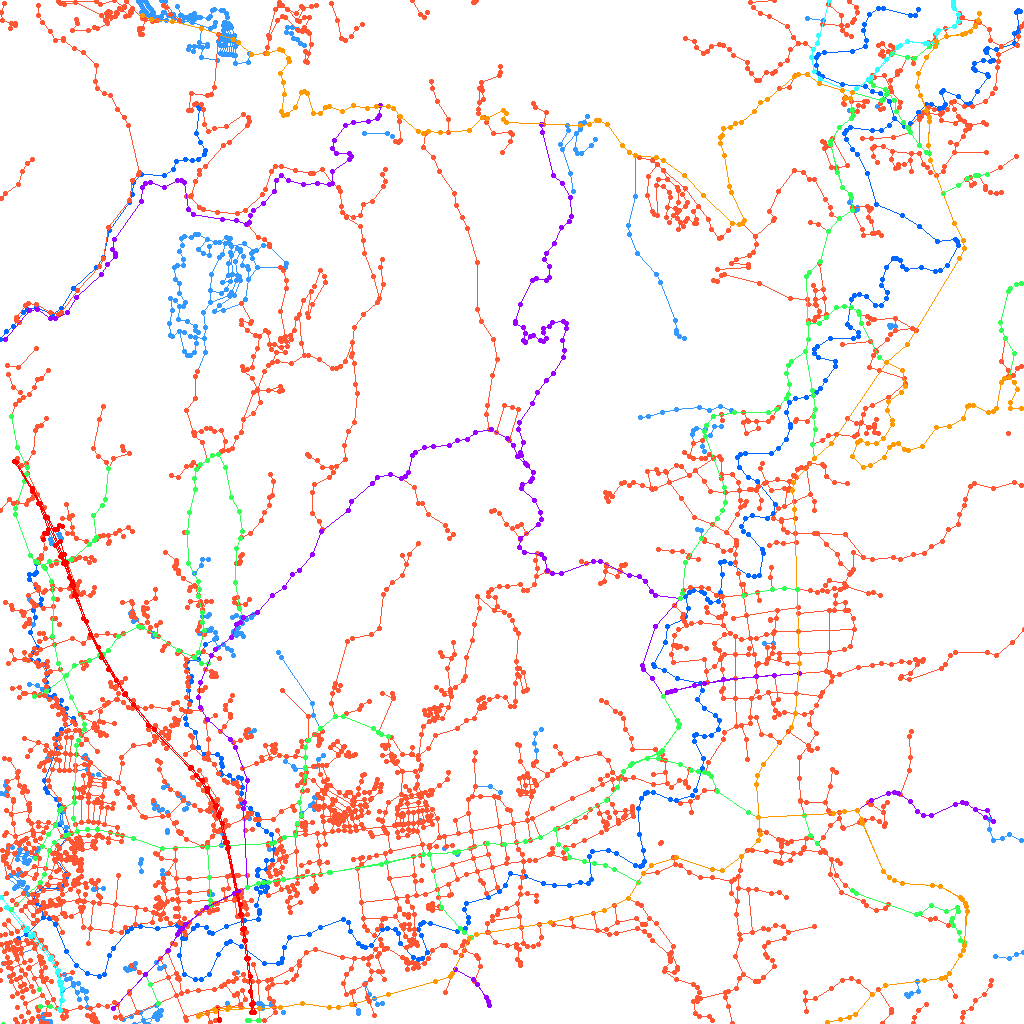

In [8]:
from PIL import Image

df = handler.get_random_tile(12)
creator.create_img(df, "../sample/random_tile.png")
display(Image.open("../sample/random_tile.png"))

In [9]:
creator.create_dataset(each_image_num=10)